# scikit-learn

***

## Scikit-learn: Overview

***

Scikit-Learn is a Python module comprising of a wide range of cutting-edge machine learning algorithms, for supervised and unsupervised problems. The module specialises in allowing non-specialist to solve machine learning problems using a general-purpose high-level language like python. [1]

As mentioned above, the problems encountered with scikit-learn can be classified as either supervised or unsupervised.

Supervised learning comprises of data with additional attributes that we can try to predict, this is further split up into two subclasses of classification and regression.

Classification problems arise when samples belong to two or more classes, and we use previously studied data to predict the behaviour of the new data. Described as discrete data, where each new data point has a finite number of options that it can satisfy for classification.

Regression analysis deals with continuous variables, where the data can alter depending on variable such as time. [2]

Unsupervised Learning is where data is inputted without any corresponding target values. The objective is for the data to determine groups within the data and to determine the distribution of the data set.

<br>

### Demonstrations of three interesting scikit-learn algorithms. You may choose these yourself, based on what is covered in class or otherwise. Note that the demonstrations are at your discretion – you may choose to have an overall spread of examples across the library or pick a particular part that you find interesting.

***

For my three algorithms I have chosen to use the iris dataset for each example. Although this reduces the amount of algorithms to choose from I feel it is the best choice as it is a dataset I am very comfortable with and can better explain.

<br>

#### Random Forest model:

The Random Forest Model is a supervised learning algorithm. It is typically used for classification problems. Named after forests in that if there are more trees the forest is stronger, so it is testing probabilities based on density of previous results.

the random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It takes an average of all the results to better fit the predictive model. It is called the random model as it randomly selects the sample training data, and it randomly splits the data into sets to learn from. [3]

The Algorithm works in four steps:

1. It selects random samples from a given dataset
2. It constructs a decision tree for each sample and predicts each sample
3. Prefroms a vote for each predicted sample
4. Selects the result with the most votes for each sample

In [1]:
#Import scikit-learn dataset library [4]
from sklearn import datasets
#Load dataset
iris = datasets.load_iris()
# print labels of species(setosa, versicolor,virginica)
print(iris.target_names)
# Lets find names of all features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3,random_state=20)

In [3]:
#Import Random Forest Model from Scikit-learn ensemble package
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [4]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


The setosas in red are easily distinguishable from the other varieties. While the versicolour and virginica are much more difficult to sperate with the naked eye. This leads me to claim I am satisfied with the ~89% success rate of the model.

<br>

#### Support Vector Machine

Support Vector Machine is a linear model for classification and regression models. It has the ability to assess linear and non-linear datasets and the machine works by splitting the dataset into separate classes by drawing lines between the data. [5]

SVM is an algorithm that takes the data as an input and outputs a line that separates those classes


In [5]:
# import the package for the model [6]

from sklearn.model_selection import train_test_split

In [6]:
# Training and Fitting the model

from sklearn.svm import SVC
model=SVC()

In [7]:
model.fit(X_train, y_train);

In [8]:
# Predictions from the trained model

pred=model.predict(X_test)

# print of the predictions for affect

print(pred)

[0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2 1 1 0 0 0 1 1
 0 1 2 1 2 0 1 1]


In [9]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

In [10]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 18  0]
 [ 0  2 12]]


This shows the matrix of results for the results of the SVM.

It correctly names all 13 setosas, names all 18 vertosa, but names 2 virginicas incorrectly.

In [11]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95        18
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



The SVM has correctly named 96% of all samples.

<br>



<br>

#### Graphs showing the closeness of the Data Points [7]

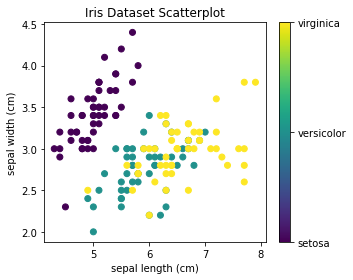

In [12]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
iris = load_iris()
# The indices of the features that we are plotting
x_index = 0
y_index = 1
 
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
 
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Iris Dataset Scatterplot')
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
 
plt.tight_layout()
plt.show()

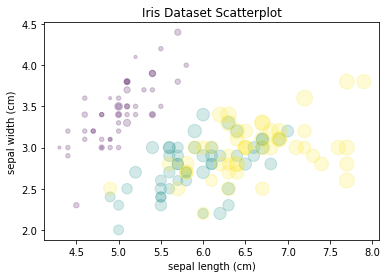

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
 
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.title('Iris Dataset Scatterplot')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

From inspection of the graphs it is clear how the models struggle to determine the differences between virginica and versicolour, it is also obvious that setosa is more easily distinguishable from the graphs.

<br>

#### K Nearest Neighbours

The k-Nearest Neighbour (kNN) algorithm makes predictions by locating similar cases to a given data instance (using a similarity function) and returning the average or majority of the most similar data instances. The kNN algorithm can be used for classification or regression. [8]

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# read in the iris data
iris = load_iris()


In [15]:
X = iris.data
y = iris.target

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# check classification accuracy of KNN with K=2
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict our sample
y_pred = knn.predict(X_test)

# evaluation our prediction
print(metrics.accuracy_score(y_test, y_pred))


0.9473684210526315


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

The K nearest neighbour determines at an accuracy of 94.7%.

## References

***

[1]. https://www.analyticsvidhya.com/blog/2021/07/15-most-important-features-of-scikit-learn/

[2]. https://scikit-learn.org/stable/user_guide.html

[3]. https://medium.com/analytics-vidhya/most-used-scikit-learn-algorithms-part-1-snehit-vaddi-7ec0c98e4edd

[4]. http://stephanie-w.github.io/brainscribble/classification-algorithm-random-forest.html

[5]. https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

[6]. https://www.kaggle.com/arshid/support-vector-machine-on-iris-flower-dataset

[7]. https://www.engineeringbigdata.com/iris-dataset-scikit-learn-machine-learning-python/

[8]. https://scikit-learn.org/stable/modules/neighbors.html#neighbors

 https://medium.com/analytics-vidhya/most-used-scikit-learn-algorithms-part-1-snehit-vaddi-7ec0c98e4edd

***